In [1]:
import os
import cv2
import io
import pickle
import requests
import zipfile
import numpy as np
from scipy import ndimage
from skimage.transform import resize
from imageio import imread, imsave
from skimage import img_as_float, color, exposure
from skimage.feature import peak_local_max, hog
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATADIR = "./training_type"
LABELS = "abcdefghijklmnopqrstuvwxyz123456789"

data = []
labels = []
subdirs = []
for subdir in os.listdir(DATADIR):
    subdirs.append(subdir)

    for file in os.listdir(DATADIR+"/"+subdir):
        image_path = os.path.join(DATADIR+"/"+subdir,file)
        image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
        hog_features = hog(image, orientations=3, pixels_per_cell=(5, 5),
                cells_per_block=(1, 1),block_norm='L2-Hys')
        data.append(hog_features)
        labels.append(LABELS.index(subdir))
        
# cv2.imshow('image',image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [3]:
print('Training the SVM')
#create the SVC
clf = LinearSVC(dual=False,verbose=1)
#train the svm
clf.fit(data, labels)

Training the SVM
[LibLinear]

LinearSVC(dual=False, verbose=1)

In [4]:
#pickle it - save it to a file
pickle.dump( clf, open( "lettersvm.detector", "wb" ) )

In [5]:
#load the detector
clf = pickle.load(open("lettersvm.detector","rb"))

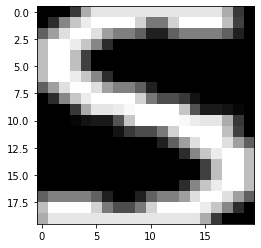

In [6]:
test_data = []
alpha_str = "abcdefghijklmnopqrstuvwxyz123456789"

#DATADIR = "./TestData"
#LABELS = "InaregulatorydocumentfiledwiththeSECtodayAdobeannouncedthatchieftechnologyofficerKevinLynchwouldbetakinghisleaveasofthiscomingFriday".lower()
DATADIR = "./testing_type"
TEST_LABELS = "NvidiasgraphicschipsarentusedjustforgamesanymoreSincethecompanymadeitschipsprogrammabletheyaretakingonfunctionsthatIntelmicroprocessorsdoAndmorethanevertheyarebeingusedforBigDatanumbercrunchingandsolvingproblemsthatpreviouslyhadtobedonebynongraphicssupercomputers".lower()
sorted_files = []
# for file in os.listdir(DATADIR):
#     try: #.ipynb checkpoint is saved in the directory sometimes
#         sorted_files.append(int(file[:file.index(".")]))
#     except:
#         continue
# sorted_files.sort()
for file in sorted(os.listdir("./testing_type"), key = lambda x: int(x[:x.index("_")])):
    sorted_files.append(file)


# count = 0
# for file in sorted_files[:len(LABELS)]:
#     file_name = str(file)+".png"
#     class_num = alpha_str.index(LABELS[count])
#     image_path = os.path.join(DATADIR,file_name)
#     image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
#     test_data.append([image,class_num])
#     count+=1

from skimage import io
count = 0
for file in sorted_files[:len(TEST_LABELS)]:
    class_num = alpha_str.index(TEST_LABELS[count])
    image_path = os.path.join(DATADIR,file)
    image = io.imread(image_path,as_gray = True)
    test_data.append([image,class_num])
    count+=1

plt.imshow(image,cmap="gray")
plt.show()

In [7]:
#print(sorted_files)
TEST_LABELS = "NvidiasgraphicschipsarentusedjustforgamesanymoreSincethecompanymadeitschipsprogrammabletheyaretakingonfunctionsthatIntelmicroprocessorsdoAndmorethanevertheyarebeingusedforBigDatanumbercrunchingandsolvingproblemsthatpreviouslyhadtobedonebynongraphicssupercomputers".lower()

alphabet = "abcdefghijklmnopqrstuvwxyz123456789"
actual = [alphabet.index(letter) for letter in TEST_LABELS]
predictions = []

for file in sorted_files[:len(TEST_LABELS)]:
    test_image_path = "./testing_type/"+file
    test_image = io.imread(test_image_path,as_gray=True)
    hog_features = hog(test_image, orientations=3, pixels_per_cell=(5, 5),
                cells_per_block=(1, 1),block_norm='L2-Hys')
    result_type = clf.predict(hog_features.reshape(1,-1))
    predictions.append(result_type[0])

#Print Letters
print("Test Letters:", "".join([LABELS[letter] for letter in actual]))
print()
print("Predicted Letters:", "".join([LABELS[letter] for letter in predictions]))

# for test,pred in zip(actual,predictions):
#     if (test != pred):
#         print(LABELS[test])
#         print(LABELS[pred])

Test Letters: nvidiasgraphicschipsarentusedjustforgamesanymoresincethecompanymadeitschipsprogrammabletheyaretakingonfunctionsthatintelmicroprocessorsdoandmorethanevertheyarebeingusedforbigdatanumbercrunchingandsolvingproblemsthatpreviouslyhadtobedonebynongraphicssupercomputers

Predicted Letters: nvidiasgraphicschipsarentusedjustforgamesanymoresincethecompanymadeitschipsprogrammabietheyaretakingonfunctionsthatinteimicroprocessorsdoandmorethanevertheyarebeingusedfor3igdatanumbercrunchingandsoivingprobiemsthatpreviousiyhadtobedonebynongraphicssupercomputers


In [8]:
print("SVM Accuracy:")
print(accuracy_score(actual,predictions))

SVM Accuracy:
0.9771863117870723


In [9]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2229bfa6fc8>)

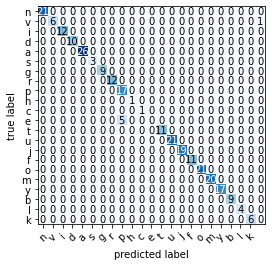

In [33]:
matrix = confusion_matrix(actual,predictions)[:-1]
prediction_labels = [LABELS[letter] for letter in predictions]
TEST_LABELS = "NvidiasgraphicschipsarentusedjustforgamesanymoreSincethecompanymadeitschipsprogrammabletheyaretakingonfunctionsthatIntelmicroprocessorsdoAndmorethanevertheyarebeingusedforBigDatanumbercrunchingandsolvingproblemsthatpreviouslyhadtobedonebynongraphicssupercomputers".lower()
unique_letters = []
for letter in TEST_LABELS:
    if letter not in unique_letters:
        unique_letters.append(letter)

plot_confusion_matrix(conf_mat=matrix, class_names = unique_letters)